In [3]:
from pytube import YouTube
from pytube import Channel
from pytube import extract
import pandas as pd
from collections import defaultdict
import os

In [2]:
import logging

logging.basicConfig(level=logging.INFO, filename='video_metadata.log', 
                    format='%(asctime)s : %(levelname)s : %(message)s',
                    datefmt='%d-%b-%y %H:%M:%S')

In [5]:
file_test = 'video_urls_FULL.csv'
df = pd.read_csv(file_test)
df = df.sample(n= 100, random_state=495).drop(columns='Unnamed: 0')

In [ ]:
#df = df[255:265].reset_index(drop= True)

In [ ]:
df.shape

In [6]:
def itags(youtube_video, url, file):

    try: 
        itag_lst = youtube_video.streams.filter(only_video=True).asc() # get the highest resolution possible

        if len(itag_lst) >= 2:
            bests = [int(itag_lst[i].itag) for i in range(0,2)]
        elif len(itag_lst) == 1:
            bests = [int(itag_lst.itag), None]
        else:
            logging.info(f'The lenght of itag_list is zero for video {url}')
            bests = [None]*2
            file.write(f'Url with no itags: {url} \n')
    except:
        logging.info(f'Itags not retrieved. Video: {url}')
        file.write(f'Itags not retrieved. Video: {url} \n')
        bests = [None]*2
        

    return bests

In [8]:
def video_metadata_v2(df):
    keys = ['channel', 'url', 'id', 'title', 'author', 'description', 'keywords', 'length_in_secs', 
            'nbr_views', 'age_resticted', 'publication_date', 'rating','best_itag','sec_itag']

    metadata = defaultdict(list)
    #destino = '../Data_collection/data/'
    catched_url = open('catched_urls_v2.txt', 'w')

    for idx in range(0,df.shape[0]):

        # Access the video url from data frame
        video_url = df['url'].iloc[idx]
        channel_name = df['channel'].iloc[idx]

        # Create a youtube object to use the API
        yt = YouTube(video_url)

        # Get itags
        itag_lst = itags(yt,video_url,catched_url)
        
        # Extract metadata
        info = [channel_name, video_url, extract.video_id(video_url), yt.title, yt.author, yt.description,
        yt.keywords, yt.length, yt.views, yt.age_restricted, yt.publish_date, yt.rating, itag_lst[0],itag_lst[1]]

        # Store in dictionary 
        for k, v in zip(keys,info):
            metadata[k].append(v)
                    
        # Track 
        if idx % 50 == 0:
            print(f'We are in video {idx} in channel {yt.author}')

    return metadata


In [9]:
# Getting all the metadata 
info = video_metadata_v2(df)

We are in video 0 in channel UGT FICA
We are in video 50 in channel LAB Sindikatua


In [11]:
df_metadata = pd.DataFrame.from_dict(info)
df_metadata

,channel,url,id,title,author,description,keywords,length_in_secs,nbr_views,age_resticted,publication_date,rating,best_itag,sec_itag
0,FITAGVIDEOS,youtube.com/watch?v=0_Ac64tilJ0,0_Ac64tilJ0,UGT FICA participa en el Foro debate Empresari...,UGT FICA,Pedro Hojas invita a la Mesa Negociadora del X...,"[ugt, fica ugt]",185,142,False,2017-12-14,None,137,136
1,Industrifacketmetall,youtube.com/watch?v=50mIptKUbOU,50mIptKUbOU,"Anders Ferbe, IF Metalls förbundsordförande",IF Metall,,"[Kongress, 2014, IF Metall, kongress14, Facket]",233,97,False,2014-05-17,None,137,136
2,fagforbundet3762,youtube.com/watch?v=s-odsdJKCpA,s-odsdJKCpA,FF1715 1900,Fagforbundet,Mandag 1700 1900,[],6481,134,False,2013-11-11,None,137,136
3,fspugt,youtube.com/watch?v=by34p_4oTI8,by34p_4oTI8,Empleadas y Empleados Públicos Esenciales: Mas...,Servicios Públicos UGT,"Homenaje, desde La Conferencia de La Mujer de ...",[],477,1133,False,2022-03-17,None,136,247
4,uniopagesoscatalunya,youtube.com/watch?v=QfqfoKfEYyk,QfqfoKfEYyk,Joves d'Unió de Pagesos - un futur amb pagesia...,Unió de Pagesos de Catalunya,Diferents membres de Joves d'Unió de Pagesos e...,[],174,373,False,2021-03-08,None,137,136
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,CSIFNacional,youtube.com/watch?v=Qv6bBOLL0zk,Qv6bBOLL0zk,CSIF pide a la Comunidad de Madrid que garanti...,CSIF Nacional,,"[Sindicato, CSI-F]",25,117,False,2020-06-25,None,134,160
96,fagforbundet3762,youtube.com/watch?v=PD9kTi5xSmE,PD9kTi5xSmE,Nei til endring av Arbeidsmiljøloven,Fagforbundet,"Sissel M. Skoghaug, nestleder av Fagforbundet:...","[Arbeidsmiljø, Fagforening, Fagforbundet]",46,118,False,2014-12-03,None,137,136
97,cgilfisac,youtube.com/watch?v=-jXo70EZydM,-jXo70EZydM,"""Sovranità, Europa e Diritti"" - Giuliano Calca...",Fisac Cgil,"L'intervento conclusivo di Giuliano Calcagni, ...","[Giuliano Calcagni, Fisac, CGIL, camera del la...",937,27,False,2019-05-23,None,137,136
98,FimCislStampa,youtube.com/watch?v=ubhOR2EC3jc,ubhOR2EC3jc,don Enrico Feroci,Fim Cisl Stampa,,[],768,86,False,2019-02-21,None,136,135


In [12]:
df_itags = df_metadata[['best_itag', 'sec_itag']]
df_itags['best_itag'] = df_itags['best_itag'].fillna(400).astype(int)
df_itags['sec_itag']=df_itags['sec_itag'].fillna(400).astype(int)

/var/folders/3m/rx3d7q5d0nbdsfzq7tmpgznw0000gn/T/ipykernel_13602/2211455120.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_itags['best_itag'] = df_itags['best_itag'].fillna(400).astype(int)
/var/folders/3m/rx3d7q5d0nbdsfzq7tmpgznw0000gn/T/ipykernel_13602/2211455120.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_itags['sec_itag']=df_itags['sec_itag'].fillna(400).astype(int)


In [13]:
list(set(df_itags['best_itag'].to_list()))

[133, 134, 135, 136, 137, 298, 313]

<AxesSubplot:>

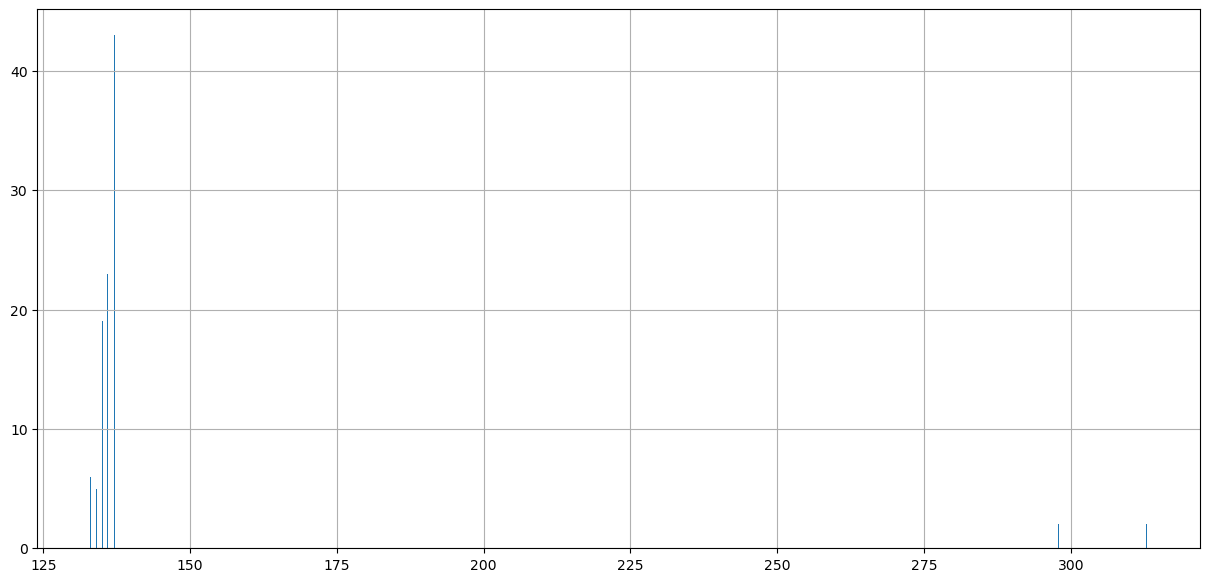

In [14]:
df_itags['best_itag'].hist(bins=1000,figsize=(15,7))

<AxesSubplot:>

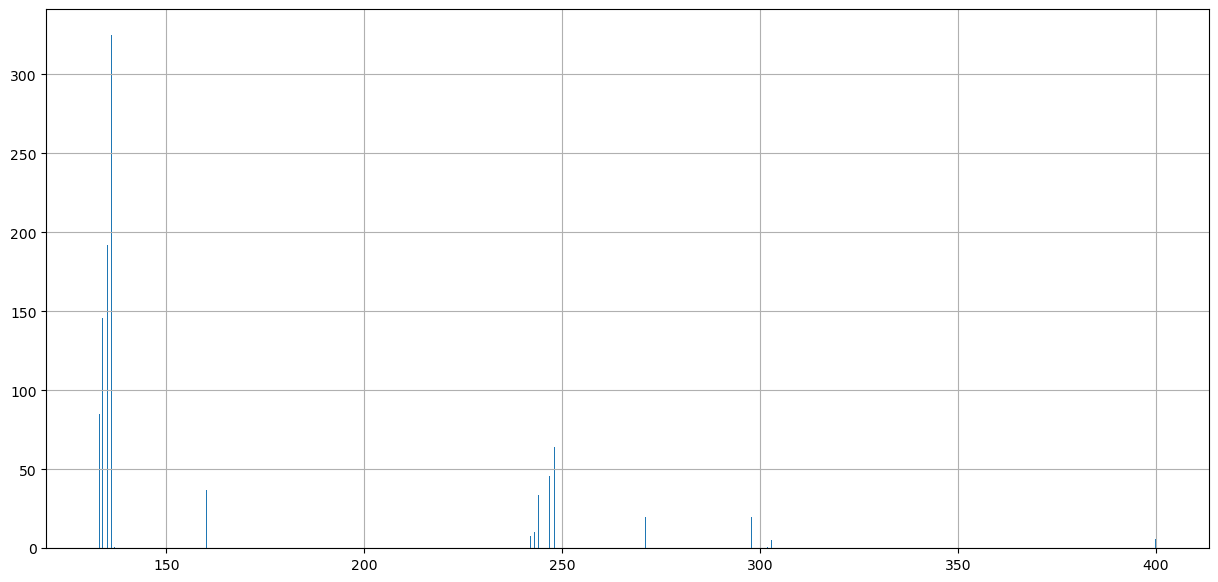

In [11]:
df_itags['sec_itag'].hist(bins=1000,figsize=(15,7))

In [9]:
file_test = 'videos_metadata_TEST.csv'
df = pd.read_csv(file_test)
#df = df.sample(n= 100, random_state=495).drop(columns='Unnamed: 0')

In [10]:
df

,channel,url,id,title,author,description,keywords,length_in_secs,nbr_views,age_resticted,publication_date,rating,best_itag,sec_itag
0,FITAGVIDEOS,youtube.com/watch?v=0_Ac64tilJ0,0_Ac64tilJ0,UGT FICA participa en el Foro debate Empresari...,UGT FICA,Pedro Hojas invita a la Mesa Negociadora del X...,"['ugt', 'fica ugt']",185.0,142.0,False,2017-12-14,NaN,137.0,136.0
1,Industrifacketmetall,youtube.com/watch?v=50mIptKUbOU,50mIptKUbOU,"Anders Ferbe, IF Metalls förbundsordförande",IF Metall,NaN,"['Kongress', '2014', 'IF Metall', 'kongress14'...",233.0,97.0,False,2014-05-17,NaN,137.0,136.0
2,fagforbundet3762,youtube.com/watch?v=s-odsdJKCpA,s-odsdJKCpA,FF1715 1900,Fagforbundet,Mandag 1700 1900,[],6481.0,134.0,False,2013-11-11,NaN,137.0,136.0
3,fspugt,youtube.com/watch?v=by34p_4oTI8,by34p_4oTI8,Empleadas y Empleados Públicos Esenciales: Mas...,Servicios Públicos UGT,"Homenaje, desde La Conferencia de La Mujer de ...",[],477.0,1133.0,False,2022-03-17,NaN,136.0,247.0
4,uniopagesoscatalunya,youtube.com/watch?v=QfqfoKfEYyk,QfqfoKfEYyk,Joves d'Unió de Pagesos - un futur amb pagesia...,Unió de Pagesos de Catalunya,Diferents membres de Joves d'Unió de Pagesos e...,[],174.0,373.0,False,2021-03-08,NaN,137.0,136.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
496,FilleaCgilNazionale,youtube.com/watch?v=0Fllxoo8XNY,0Fllxoo8XNY,28.06.16 Dario Boni Fillea Cgil,FilleaCgil,"CCNL Edilizia: la relazione di Dario Boni, seg...","['fillea', 'dario boni', 'cgil', 'edilizia', '...",1369.0,96.0,False,2016-07-04,NaN,136.0,135.0
497,avantarvideos,youtube.com/watch?v=AGJ401tlY5c,AGJ401tlY5c,#10M coa CIG - Resumo nacional do Día da Clase...,avantarvideos,"Baixo o lema “Reformas Laborais e Lei Mordaza,...","['cig', 'sindicalismo nacionalista', 'nacional...",465.0,103.0,False,2016-03-11,NaN,137.0,248.0
498,CCOOCeuta,youtube.com/watch?v=81nqI3UzCu4,81nqI3UzCu4,Manifestación de parados en Ceuta. 24 de febre...,CCOOCeuta,NaN,['24022010'],577.0,28.0,False,2010-02-26,NaN,134.0,133.0
499,Uilcanetwork,youtube.com/watch?v=nR33SwTb5qg,nR33SwTb5qg,#conuilca5 3 ott 2014 E' successo oggi di Uilc...,Uilca Nazionale,NaN,"['#conuilca5', 'uilca', 'congresso nazionale',...",198.0,13.0,False,2014-11-02,NaN,135.0,134.0
